In [ ]:
# Data : Images

In [ ]:
! pip install kaggle

In [ ]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d vbookshelf/rice-leaf-diseases

 95% 35.0M/36.7M [00:00<00:00, 97.9MB/s]
100% 36.7M/36.7M [00:00<00:00, 97.6MB/s]


In [ ]:
! unzip rice-leaf-diseases.zip

Archive:  rice-leaf-diseases.zip
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0365.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0366.jpg  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0367.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0370.jpg  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0372.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0373.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0374.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0375.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0376.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0377.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0378.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0379.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0380.JPG  
  inflating: rice_leaf_diseases/Bacterial leaf blight/DSC_0381.JPG  
 

In [ ]:
#Preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]
DATADIR = '/content/rice_leaf_diseases'
CATEGORIES = ['Bacterial leaf blight','Brown spot','Leaf smut']
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)#label encoding values
  path=os.path.join(DATADIR,category)#path to use all images
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #print (img_array.shape)
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<BarContainer object of 3 artists>

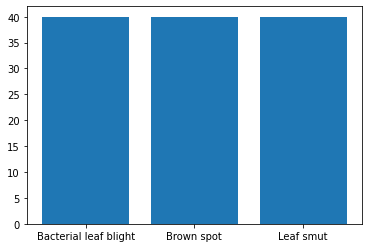

In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
#split data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.1,random_state=109)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
n_estimators=[int(x) for x in np.linspace(start=10,stop=100,num=10)]
max_depth=[2,6]
min_samples_split=[2,6]
min_samples_leaf=[2,6]
bootstrap=[True,False]
max_features=['auto','sqrt']

random_grid={'n_estimators': n_estimators,
           'max_depth': max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'bootstrap':bootstrap,
           'max_features':max_features,}
print(random_grid)
rf_model=RandomForestClassifier()
rf_grid=GridSearchCV(estimator=rf_model,param_grid=random_grid,cv=5,verbose=2,n_jobs=4)
rf_grid.fit(x_train,y_train)
rf_grid.best_params_

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [2, 6], 'min_samples_split': [2, 6], 'min_samples_leaf': [2, 6], 'bootstrap': [True, False], 'max_features': ['auto', 'sqrt']}
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


{'bootstrap': False,
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 70}

In [ ]:
a1=np.shape(x_train)
a2=np.shape(y_train)
print(a1)
print(a2)
x_train1=np.arange(0,len(x_train),1)
x_test1=np.arange(0,len(x_test),1)
a1=np.shape(x_train1)
a2=np.shape(x_test1)
print(a1)
print(a2)

(108, 67500)
(108,)
(108,)
(12,)


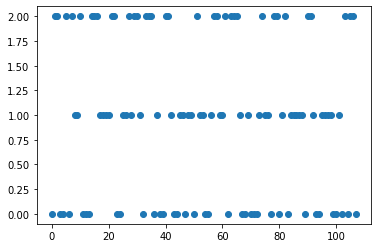

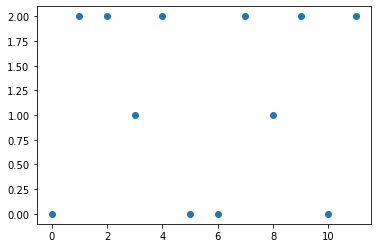

train score 1.000
test score0.917
Precision Score :  0.9166666666666666
Recall Score :  0.9166666666666666
f1 Score :  0.9166666666666666
[[4 0 0]
 [0 2 0]
 [0 1 5]]


In [ ]:
from numpy.core.fromnumeric import reshape
from sklearn.metrics import accuracy_score
plt.scatter(x_train1,y_train)
plt.show()
plt.scatter(x_test1,y_test)
plt.show()
y_pred=rf_grid.predict(x_test)
print(f'train score {rf_grid.score(x_train,y_train):.3f}')
print(f'test score{rf_grid.score(x_test,y_test):.3f}')
accuracy_score(y_pred,y_test)
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)
prec=precision_score(y_test, y_pred,average='micro')
reca=recall_score(y_test, y_pred,average='micro')
f1sco=f1_score(y_test, y_pred,average='micro')
print("Precision Score : ",precision_score(y_test, y_pred, 
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           average='micro'))
print("f1 Score : ",f1_score(y_test, y_pred, 
                                           average='micro'))
print(cm)